In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.rcParams['font.family'] = 'Noto Sans CJK JP'
plt.rcParams["font.size"] = 18


In [5]:
# SIRモデルの微分方程式を定義
def sir_model(y, t, beta, gamma):
    S, I, R = y
    dS_dt = -beta * S * I
    dI_dt = beta * S * I - gamma * I
    dR_dt = gamma * I
    return [dS_dt, dI_dt, dR_dt]


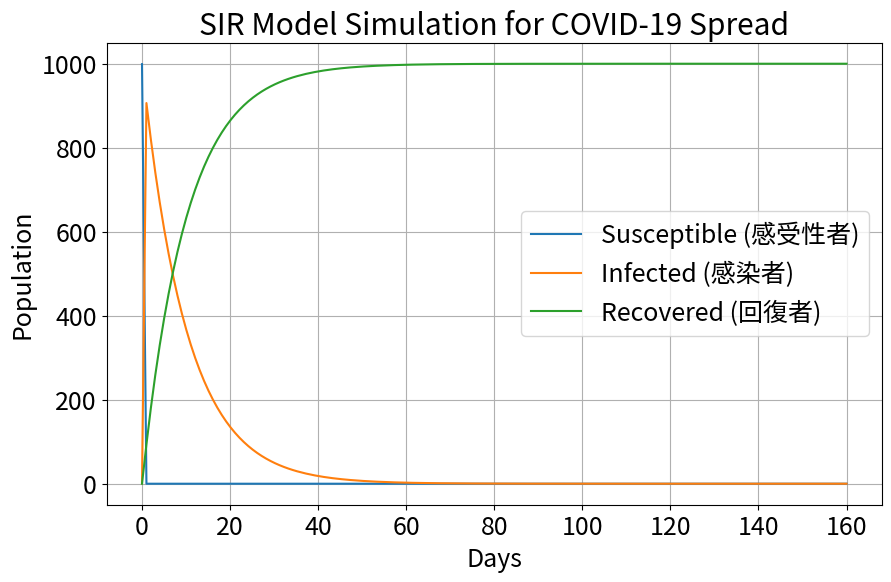

In [6]:

# 初期パラメータ
N = 1000           # 総人口
I0 = 1             # 初期感染者数
R0 = 0             # 初期回復者数
S0 = N - I0 - R0   # 初期の感受性者数（感染も回復もしていない人の数）
beta = 0.3         # 感染率
gamma = 0.1        # 回復率
days = 160         # シミュレーションの日数

# 初期条件と時間の設定
y0 = [S0, I0, R0]
t = np.linspace(0, days, days)

# odeintで微分方程式を解く
solution = odeint(sir_model, y0, t, args=(beta, gamma))
S, I, R = solution.T

# 結果をプロット
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible (感受性者)')
plt.plot(t, I, label='Infected (感染者)')
plt.plot(t, R, label='Recovered (回復者)')
plt.xlabel('Days')
plt.ylabel('Population')
plt.title('SIR Model Simulation for COVID-19 Spread')
plt.legend()
plt.grid(True)
plt.show()